#  Housing Prices Competition

In this notebook, I will be using the Housing Prices dataset (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) to predict future housing prices by applying different linear regression and decision tree models.

# Importing Libraries 

I am importing the relavant libraries which will be used. 

In [1]:
# Importing packages to deal with dataframes and numerical functions
import pandas as pd
import numpy as np
from scipy import stats

# Importing modules for graphing data
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# stores plot within notebook
%matplotlib inline

# Importing package which makes plots have same theme as notebook, using jtplot.style()
#from jupyterthemes import jtplot

# corrects behaviour between panda and matplotlib libraries
pd.plotting.register_matplotlib_converters()

# Python Machine Learning (ML) library Scikit-Learn
import sklearn
import xgboost 
import category_encoders as ce

# Importing ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Importing error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import kurtosis, skew

# Importing data manipulation tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, MultiLabelBinarizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from scipy.stats import norm

# ensures cross platform functionality
import os 

# Importing Data

Now I will import the train, test and sample data.

In [2]:
# importing training data
train_df = pd.read_csv(r'train.csv') 

# importing test data
test_df = pd.read_csv(r'test.csv')

#importing sample submission data
sample_df = pd.read_csv(r'sample_submission.csv')

# Examining the Datasets

I am going to check the structure of the training set, discovering questions such as, how large the data is, what the data contains, are there any missing values etc. 

First, let me get a quick look at the first few rows of the data.

In [3]:
# displaying the first 5 rows of data
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


I want to get some general information about the data set which may be useful later on.

In [4]:
# displaying various statistical information about training data
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


As the dataset has a large number of columns, not all of them are showing when displaying the dataframe, so I will print all the column names. It could also be useful to know the shape of the dataframe.

In [5]:
# Printing all the column names
print(train_df.columns)
train_df.shape

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

(1460, 81)

I want to see how varied the instances of Sale Price are in the training data, so I will plot a univariate distribution which shows the probability of occurrence of Sale Price.

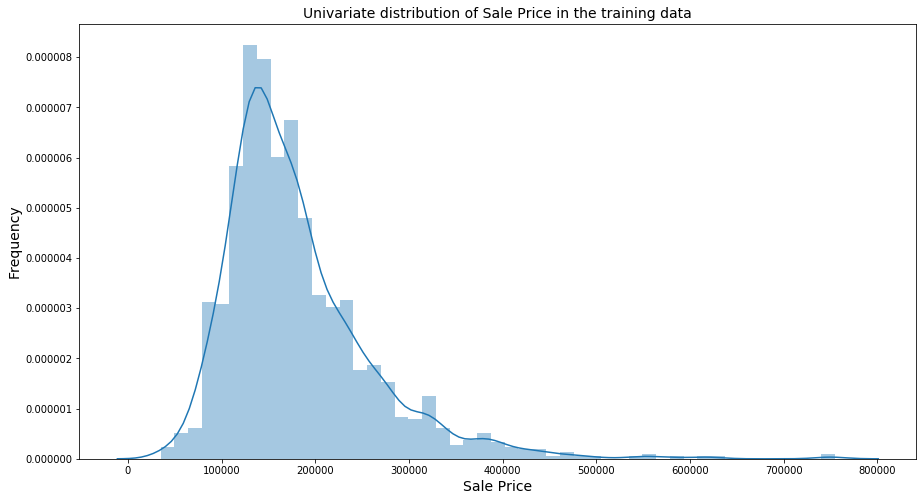

In [6]:
# Setting the size of the figure
plt.figure("sale_price_histogram", figsize=(15,8))

# Giving the graph a title
plt.title("Univariate distribution of Sale Price in the training data", fontsize = 14)

plt.ylabel("Frequency", fontsize = 14)

plt.xlabel("Sale Price", fontsize = 14)

# Plotting univariate distribution of sale price
sns.distplot(train_df.SalePrice, axlabel = False)

plt.show;

This graph clearly shows that the distrbution peaks somewhere inbetween 100,000-200,000 dollars. The SalePrice has a positive skewness away from the normal distribution.

I think it would be worth to just get a general overview of how correlated all the features are with each other.

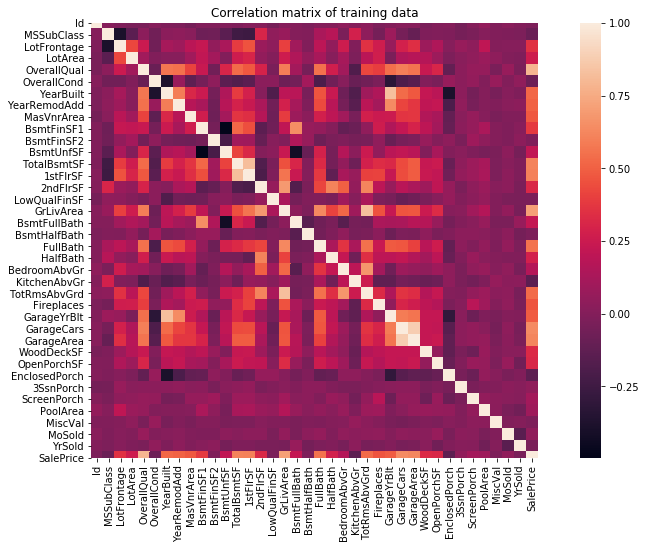

In [7]:
plt.figure('correlation_matrix_training', figsize = (15,8))

# Calculating the correlation matrix of the dataframe train_df
corr_train = train_df.corr()

sns.heatmap(data=corr_train, square = True)

plt.title('Correlation matrix of training data')

plt.show;

Clearly, this does not provide too much information about the dataset as it is difficult to read. Hence, I will check  which features have the most impact on Sale Price by finding the top 10 correlated features.

In [8]:
# Creating a function which returns the n top correlations with SalePrice
def get_top_correlations(df, n):
    #df.corrwith returns the correlation with SalePrice
    a_corr = df.corrwith(df['SalePrice'])
    # implementing a loop through the rows of the series au_corr to pick the n largest correlations
    for row in a_corr:
        n_largest = a_corr.nlargest(n)
        return n_largest

In [9]:
# Calling function get_top_correlations to find the top 10 correlating features with SalePrice
correlations_top_10 = get_top_correlations(train_df, 10)

# Printing the correlation coefficients
print(correlations_top_10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
dtype: float64


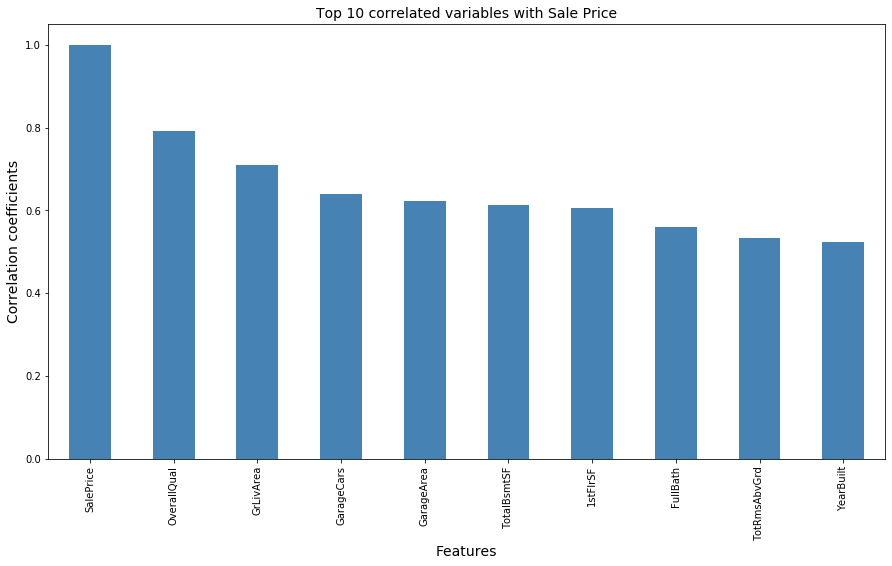

In [10]:
#Plotting a bar chart to easily identify which features are most correlated with SalePrice

plt.figure('top_10_correlated_saleprice',figsize=(15,8))

plt.title("Top 10 correlated variables with Sale Price", fontsize = 14)

plt.ylabel("Correlation coefficients", fontsize = 14)

plt.xlabel("Features", fontsize = 14)

correlations_top_10.plot.bar(color = 'steelblue')

plt.show;

As seen in the barplot, OverallQual, GrLivArea and GarageCars are all strongly correlated with Sale Price. The rest of the features are moderatly correlated with Sale Price. 

The above graph shows the top 10 correlated variables with Sale Price. But it would be nice to see scatter graphs of the strongly correlated numerical features with Sale Price. Categorical features (for the moment) cannot demonstrate any correlation with Sale Price as they do not have any values assigned to them.

<Figure size 1800x1440 with 0 Axes>

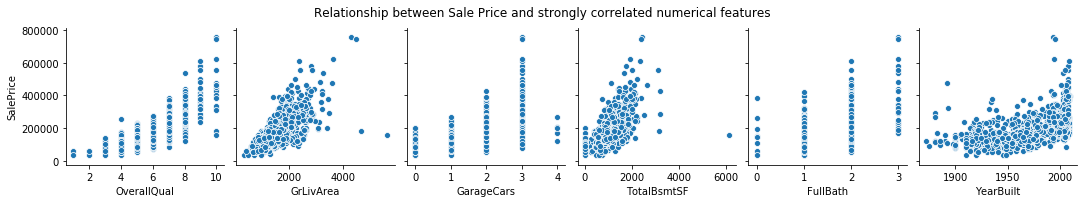

In [16]:
plt.figure(figsize = (25,20))

# Selecting only the columns which have numerical values and plotting a scatter plot against SalePrice
top_correlated_feat = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

sale_price_scatter = sns.pairplot(train_df[top_correlated_feat], y_vars = ['SalePrice'],
             x_vars = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'],
             height = 2.5)

sale_price_scatter.fig.suptitle("Relationship between Sale Price and strongly correlated numerical features", y=1.08)

plt.tight_layout(pad = 0.5)
plt.show;

The above scatter plots give a very easy visual representation of the relationship of different numerical features with sale price. 

As expected, the higher the overall quality of the housebuild, the higher the sale price. This is also the case for ground living area. We had confirmed both of these before from our correlation coefficients, but now we can visually see the relationship. 

I also find interesting that houses built after 2000 increase in price a lot more than before 2000. I think it may be worth checking what is different about these houses, and possibly speaking to a housing expert. 

# Processing Data

### Checking skewness and kurtosis

In the univariate distribution plot of SalePrice, we saw that the training data had a postive skewness. I want to check the actual value of the skewness and to check another piece of information about the SalePrice, the kurtosis. Skewness is a measure of how symmetric a distribution is, whilst kurtosis is a measure of the heaviness of the tail of the distribution i.e. a measure of the number of outliers in the data. 

Skewness can be calculated using the following formula:

$$ \large{ s = \frac{\sum\limits_{i=1}^N (x_{i} - \bar{x})^{3}}{\sigma^{3}} }$$

whilst, kurtosis can be calculated using the following formula:

$$ \large{ K = \frac{1}{N} \sum\limits_{i=1}^N {\bigg( \frac{x_{i} - \mu}{\sigma} \bigg)}^4 } $$

In [12]:
# Calculating skewness and kurtosis

skew_SalePrice = skew(train_df['SalePrice'])
print('Skewness of sale price is:', skew_SalePrice)

kurt_SalePrice = kurtosis(train_df['SalePrice'])
print('Kurtosis of sale price is:', kurt_SalePrice)

Skewness of sale price is: 1.880940746034036
Kurtosis of sale price is: 6.509812011089439


As seen in the values of skewness and kurtosis, SalePrice demonstrates it has positive skewness and a significant positive kurtosis. This means the data is not normally distributed, as normally distributed data will have a skewness of 0 and a kurtosis of 0 (Python uses Fisher's definition as default). 

Additionally, I will create a probability plot of sale price to see how the data compares to its best fit line. 

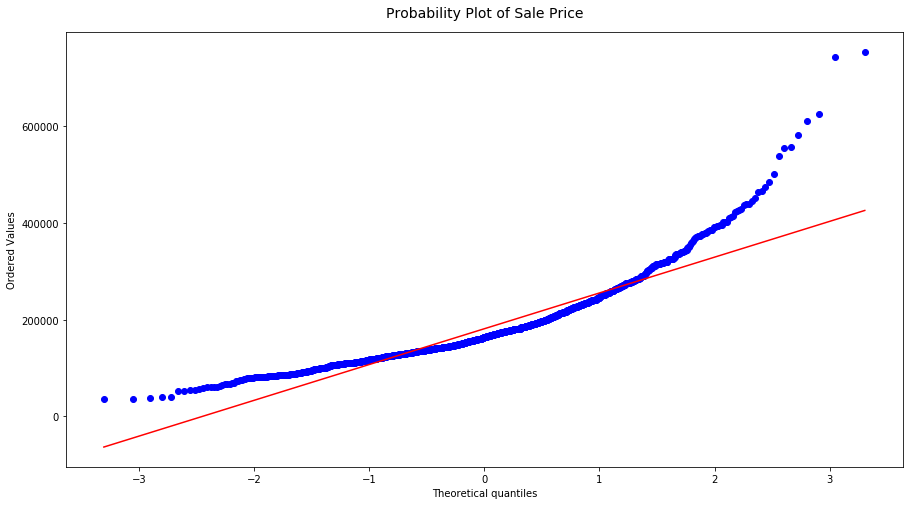

In [13]:
plt.figure(figsize = (15,8))

# Plotting quantiles of probability of SalePrice
stats.probplot(train_df['SalePrice'], plot = plt)

plt.title("Probability Plot of Sale Price", fontsize = 14, y=1.02)

plt.show;

As we can see in the above graph, SalePrice does not follow the diagonal line, further demonstrating that the data is not normally distributed. One may ask about my obesession with comparing the data to a normal distribution? It is because the simplicity of normally distributed data makes it much easier to build more accurate models. Skewed data can violate inbuilt model assumptions and distort which features are more important in model building. For example, in our housing data set, we may train the model on a much larger number of expensive homes, so when making predictions on moderately priced homes, our model will be less accurate.

### Sale Price log-transformation

To transform the distribution of SalePrice into a normal distribution, I will use a log-transformation. This is a simple transformation using the log function from numpy

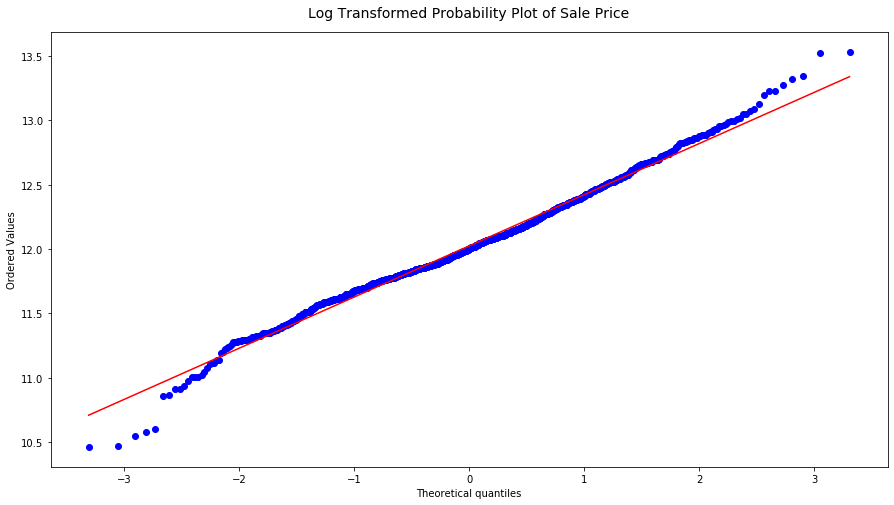

In [14]:
plt.figure(figsize = (15,8))

#Applying the log function from numpy to all values in the SalePrice column. Storing it back in the DF at SalePrice 
train_df['SalePrice'] = np.log(train_df.SalePrice)

stats.probplot(train_df['SalePrice'], plot = plt)

plt.title("Log Transformed Probability Plot of Sale Price", fontsize = 14, y=1.02)

plt.show;

Clearly, the data follows the straight line much better indicating SalePrice has been normalised. We can verify this by calculating the skewness and kurtosis again.

In [15]:
skew_SalePrice = skew(train_df['SalePrice'])
print('Skewness of sale price is:', skew_SalePrice)

kurt_SalePrice = kurtosis(train_df['SalePrice'])
print('Kurtosis of sale price is:', kurt_SalePrice)

Skewness of sale price is: 0.1212103673013655
Kurtosis of sale price is: 0.8026555069117713


Therefore, SalePrice is much closer to a normal distribution and is now more useful for when we build models.

Finally, let me replot the distribution of the SalePrice to see its newly normally didstributed self in all its glory. In this case, I have compared it to a perfect standard normal distribution of the data

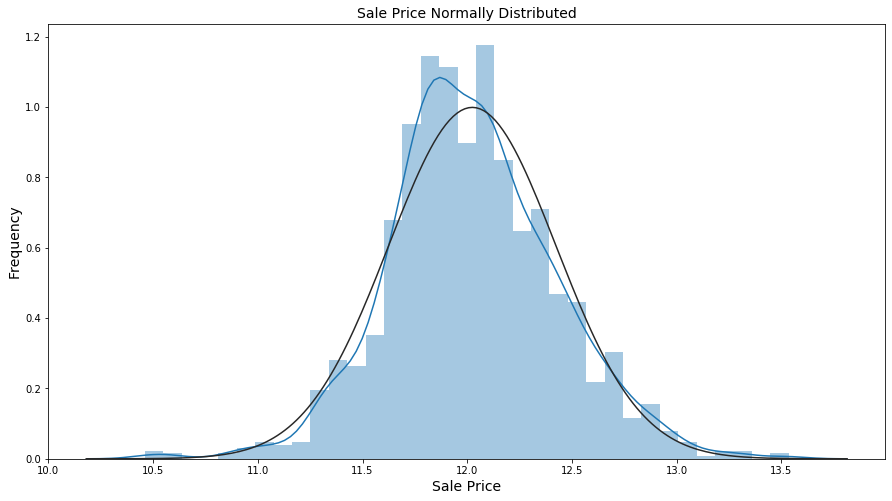

In [16]:
plt.figure(figsize=(15,8))

plt.title("Sale Price Normally Distributed", fontsize = 14)

plt.ylabel("Frequency", fontsize = 14)

plt.xlabel("Sale Price", fontsize = 14)

sns.distplot(train_df.SalePrice, axlabel = False, fit=norm)

plt.show;

### Missing Values

Now I am going to check which columns have lots of missing values, so I can remove those columns from the dataframe. Columns with lots of missing values shouldn't affect SalePrice much.

In [17]:
#Printing percentage of values missing in each column
missing_lots = train_df.isna().mean() * 100

#Dropping features with percentage missing values < 6% as these still hold lots of information
missing_lots_reduced = missing_lots.drop(missing_lots[missing_lots < 6].index).sort_values()
print(missing_lots_reduced)

LotFrontage    17.739726
FireplaceQu    47.260274
Fence          80.753425
Alley          93.767123
MiscFeature    96.301370
PoolQC         99.520548
dtype: float64


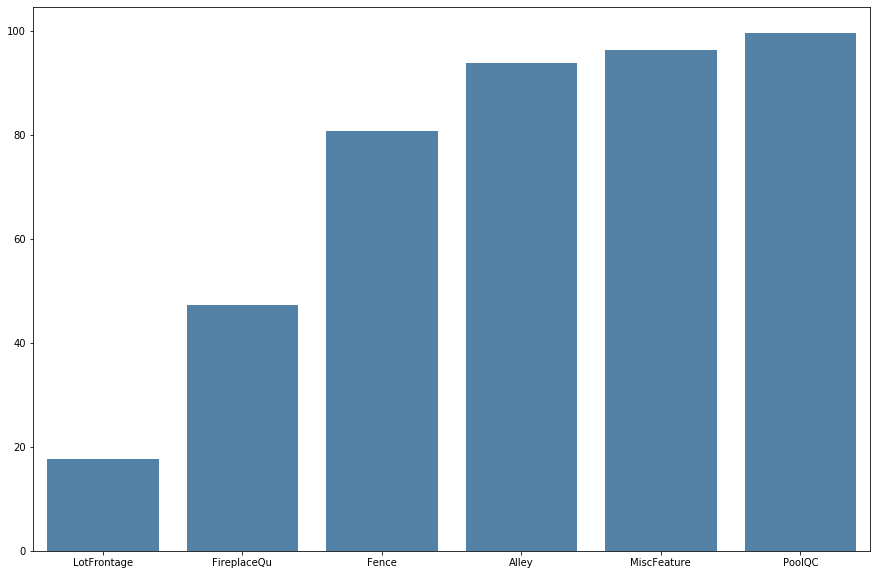

In [18]:
# Plotting percentage of missing values
plt.figure(figsize = (15,10))

sns.barplot(x = missing_lots_reduced.index, y = missing_lots_reduced, color = 'steelblue')

plt.show;

As we can see in the plot, the features Alley, PoolQC, Fence and MiscFeatures are missing over 80% of their values. This does not necessarily mean that this data was not collected, but most houses just do not have these features. Because of this, these features will not contribute much to our prediction of SalePrice, hence we can drop them from the Dataframe.

I have decided to drop any features missing more than 15% of their values, as we can conclude that there is not enough information left in that feature to build an accurate model. Furthermore, by looking at the individual features which are missing lots of values, I can assume that they are not very important factors to consider when buying a house, therefore I will drop the above features.

In [19]:
# Dropping features which are missing over 15% of their values
train_df = train_df.drop(columns = missing_lots_reduced.index)
train_df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,12.429216


Now I will deal with features with only a few missing values.

In [20]:
missing_small = train_df.isna().mean() * 100

missing_small_reduced = missing_small.drop(missing_small[missing_small == 0].index).sort_values()
print(missing_small_reduced)

Electrical      0.068493
MasVnrType      0.547945
MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
BsmtExposure    2.602740
BsmtFinType2    2.602740
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64


In [21]:
#Counting the number of missing values for each feature
missing_small_count = train_df.isnull().sum()
missing_small_count_reduced = missing_small_count.drop(missing_small_count[missing_small_count == 0].index).sort_values()
print(missing_small_count_reduced)

Electrical       1
MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
BsmtExposure    38
BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64


$\textbf{Electrical}$: this feature only has one missing value, so we will just remove that row from the dataframe.

$\textbf{MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtFinType1, BsmtExposure, and BsmtFinType2}$: all of these features do not have many missing values so we will remove them from the dataframe. Many of these rows overlap so we would only be removing a maximum of 46 rows which only represents $2.6 \%$ of the dataframe. So the effect on our model will be minimal. 

$\textbf{GarageType}$: this feature holds useful information about the garage location and if there is no garage so I will impute these 81 values later on.

$\textbf{GarageYrBlt, GarageFinish, GarageQual and GarageCond}$: these features are all closely related. Hence I will keep GarageQual and remove the rest of the features. The 81 missing values will be imputed later on.

In [22]:
#Removing various rows and features from dataframe
train_df = train_df.dropna(subset = ['Electrical', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 
                                     'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2'])
train_df = train_df.drop(columns = ['GarageYrBlt', 'GarageFinish', 'GarageCond'])

In [23]:
train_df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,12.429216


### Imputation

When I was removing missing values, I was still left with missing values in GarageType and GarageQual. I will now impute these values. Imputation is the process by which you replace a missing value with some other value e.g. mean or in a categorical features case, the most popular type of feature. First, lets get some more information about GarageType and GarageQual. 

In [24]:
# Counting the number of instances in a feature
print('No. of instances of values in GarageType: \n', train_df['GarageType'].value_counts(dropna = False))
print('\n No. of instances of values in GarageQual: \n', train_df['GarageQual'].value_counts(dropna = False))

No. of instances of values in GarageType: 
 Attchd     852
Detchd     369
BuiltIn     85
NaN         74
Basment     19
CarPort      7
2Types       6
Name: GarageType, dtype: int64

 No. of instances of values in GarageQual: 
 TA     1270
NaN      74
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64


It seems most houses have garages. Therefore for GarageType, I will impute the missing values with Attchd and for GarageQual I will impute the missing values with TA. 

In [25]:
#Filling missing values in GarageType with Attchd
train_df['GarageType'].fillna(value = 'Attchd', inplace = True)

In [26]:
#Filling missing values in GarageQUal with TA
train_df['GarageQual'].fillna(value = 'TA', inplace = True)

In [27]:
#Checking that I have dealt with all of the missing values
missing_check = train_df.isna().mean() * 100
missing_check = missing_check.drop(missing_check[missing_check == 0].index).sort_values()
print(missing_check)

Series([], dtype: float64)


Clearly, there are no longer any missing values.

### Dealing with Outliers

Outliers are pieces of data which do not match the overall distribution of its dataset. These datapoints can arise due to mistakes or variances in the data, and if they detract from the overall information of the dataset then we need to identify and remove them. We can tell if a particular datapoint is an outlier if it lies outside the range of a histogram of all the datapoints of that particular feature. This process is known as univariate analysis. 

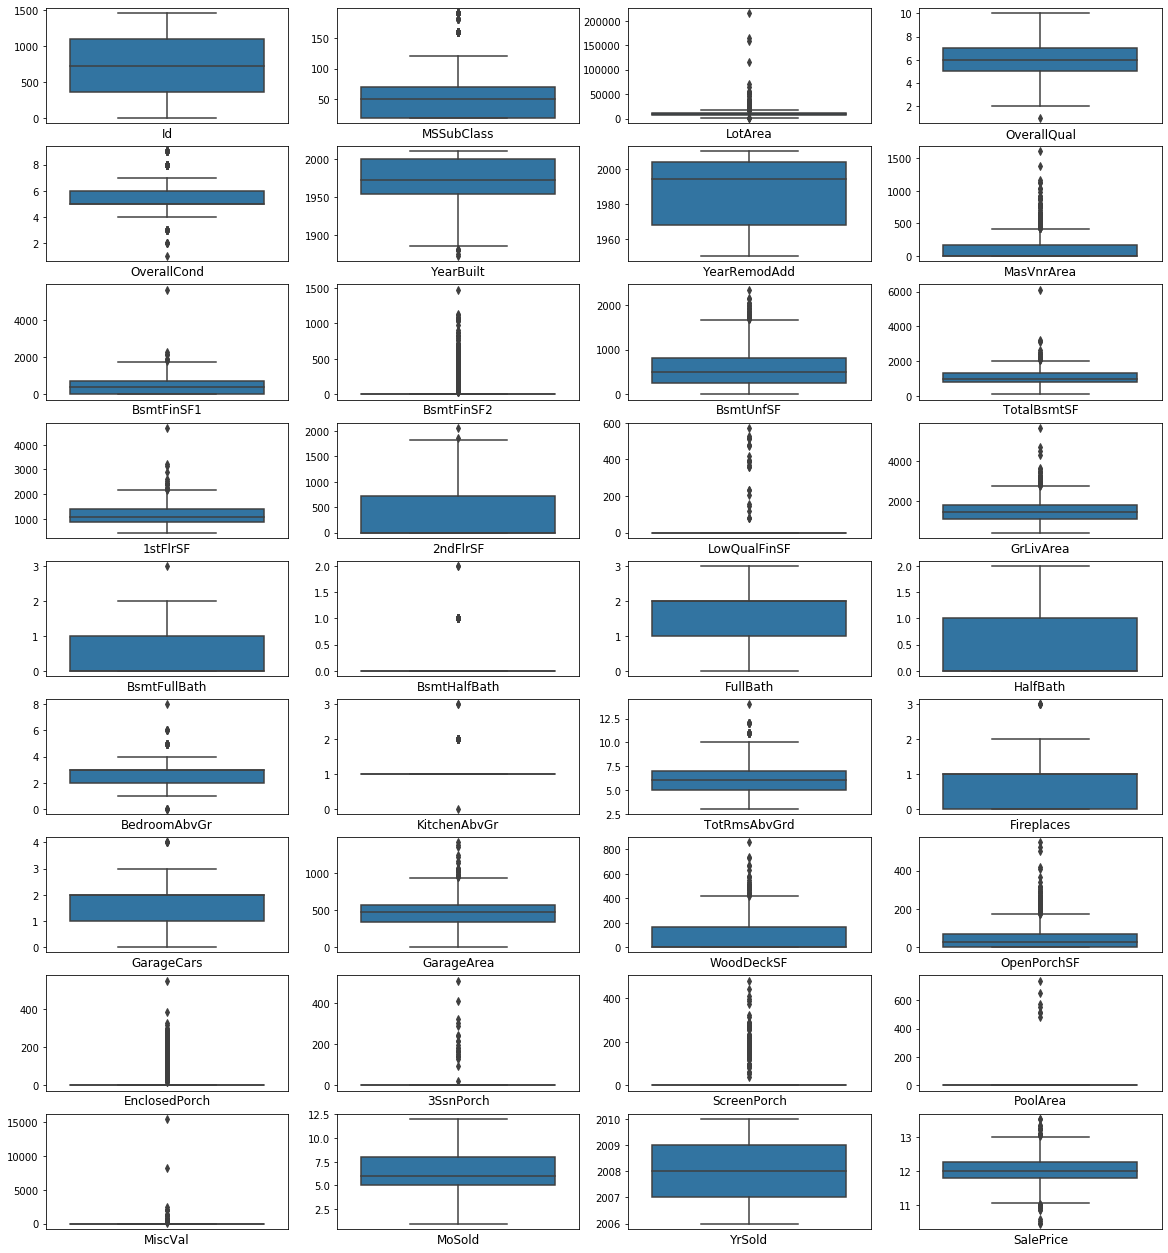

In [28]:
plt.figure(figsize=(20,25))

numerical_cols = train_df.select_dtypes(exclude = 'object')

#This 'for' loop allows me to loop over numerical_cols using enumerate, whilst keeping track of the index in i
for i, col in enumerate(numerical_cols.columns):
    # axes allows you to plot multiple axes and do things to the individual axes (i.e. label them)
    axes = plt.subplot(10,4,i+1)
    sns.boxplot(data = train_df[col])
    axes.set_xlabel(col, fontsize = 12)
    axes.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
    
plt.tight_layout
plt.show;

As we can see in the graphs above, many of the features display outliers. I am going to remove some of them from the data set to build a more accurate model. However, I will not remove all of the outliers. Some features only have one or two outliers so they have a very minimal impact on the dataset, so it is safe to leave them in. Some outliers are still quite close to the other values in that feature, so do not need to be removed. 

For some of the histograms, it seems they do not have enough data to produce a histogram and demonstrate many outliers (e.g. EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, and MiscVal etc). These points are misleading, as they do not really represent outliers, but rather most houses do not have these features hence there not being enough data to produce a histogram. Therefore, these datapoints are not outliers and can remain as part of our dataset. 

To choose which outliers from a particular feature which need to be removed, I still need some more information. As the business question is related to SalePrice, I am interested in how these features affect SalePrice. Therefore, I am going to conduct some bivariate analysis and plot scatter plots of the numerical features against SalePrice, to visually see how SalePrice is dependent on each feature.


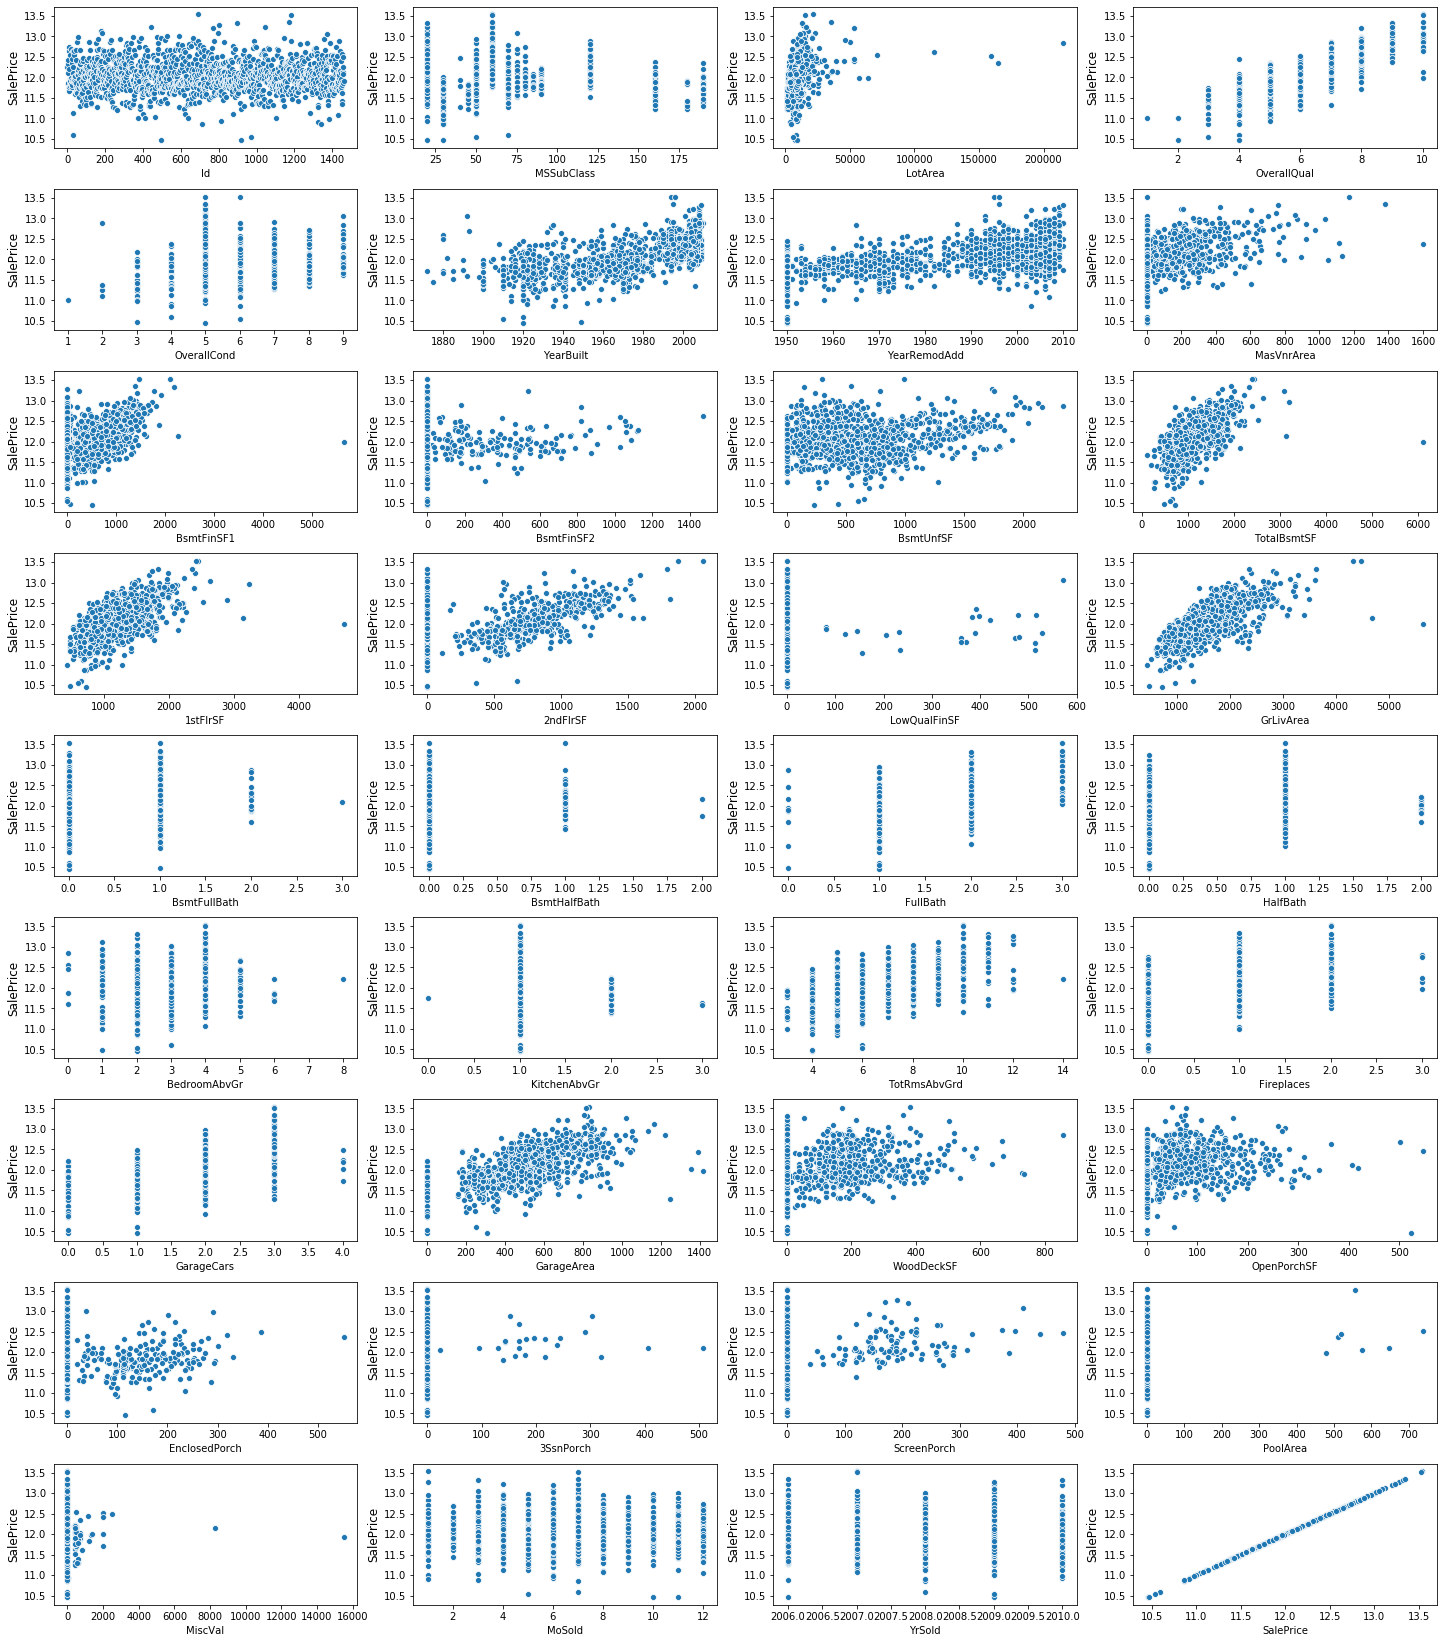

In [29]:
plt.figure(figsize=(20,25))

for i, col in enumerate(numerical_cols.columns):
    axes = plt.subplot(10,4,i+1)
    sns.scatterplot(x = train_df[col], y = train_df['SalePrice'])
    axes.set_ylabel('SalePrice', fontsize = 12) 

plt.tight_layout(pad = 1.0)
plt.show;

Based on looking at the number of outliers from the univariate analysis and checking how points vary with SalePrice using bivariate analysis, I have concluded that only the following features need outliers to be removed:

- GrLivArea
- SalePrice

To decide which outliers to remove and to keep in these two features, I will use the 1.5 Interquartile Range (IQR) rule, where any points below (First Quartile - 1.5IQR) and above (Third Quartile + 1.5IQR) will be removed.

In [30]:
#Calculating IQR for GrLivArea and SalePrice
q1_GrLivArea, q3_GrLivArea = np.percentile(train_df['GrLivArea'], [25,75])
iqr_GrLivArea = q3_GrLivArea - q1_GrLivArea

q1_SalePrice, q3_SalePrice = np.percentile(train_df['SalePrice'], [25,75])
iqr_SalePrice = q3_SalePrice - q1_SalePrice

In [31]:
#Calculating lower and upper bound thresholds for outliers
lower_bound_GrLivArea = q1_GrLivArea -(1.5 * iqr_GrLivArea) 
upper_bound_GrLivArea = q3_GrLivArea +(1.5 * iqr_GrLivArea)

lower_bound_SalePrice = q1_SalePrice -(1.5 * iqr_SalePrice) 
upper_bound_SalePrice = q3_SalePrice +(1.5 * iqr_SalePrice)

In [32]:
# Creating booleans to find outliers
outliers = train_df[(train_df['GrLivArea'] < lower_bound_GrLivArea) | (train_df['GrLivArea'] > upper_bound_GrLivArea) 
                    | (train_df['SalePrice'] < lower_bound_SalePrice) 
                    | (train_df['SalePrice'] > upper_bound_SalePrice)].index

train_df = train_df.drop(outliers)

In [33]:
# Checking outlier rows have been dropped
train_df.shape

(1362, 72)

### Encoding Categorical Variables

Most Machine Learning models cannot pass categorical variables into the predictions, therefore I am going to covert them into a usable format. But first, I need to change the type of data represented in some features as they are misleading. 

In [34]:
# Changing these features back into strings as currently the dataframe sees them as integers
train_df['MSSubClass'] = str(train_df['MSSubClass'])
train_df['OverallCond'] = str(train_df['OverallCond'])
train_df['OverallQual'] = str(train_df['OverallQual'])
train_df['YrSold'] = str(train_df['YrSold'])
train_df['MoSold'] = str(train_df['MoSold'])

In [35]:
train_df.select_dtypes(exclude = 'object').columns # will need later

Index(['Id', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

I will use a strategy called one-hot encoding which gives a value of 1 for each type which occurs in a particular categorical feature and gives a value of 0 if that type is not present. This is a simple way to encode all of the categorical features and should prove useful

In [36]:
train_df = pd.get_dummies(train_df)
train_df.head()

,Id,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,1,0,0,0,0,1,0
1,2,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,1,0,0,0,0,1,0
2,3,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,1,0,0,0,0,1,0
3,4,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,1,1,0,0,0,0,0
4,5,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,1,0,0,0,0,1,0


### Checking skewness and kurtosis of rest of dataset

Only the numerical features demonstrate skewness and kurtosis, so we will select these columns first. And then we will check their skewness and kurtosis to decide whether we will log transform the feature. NB: we will not do this for categorical features which have been encoded. I will only use the numerical features which are not discrete (e.g. YearBuilt etc.)

In [37]:
numerical_columns = ['LotArea',  'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
       'BedroomAbvGr', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


for i, col in enumerate(numerical_columns):
    skewness = train_df[col].skew()
    kurt = train_df[col].kurtosis()
    print('Skewness of', col, 'is', skewness)
    print('Kurtosis of', col, 'is', kurt, '\n')

Skewness of LotArea is 12.728694101002754
Kurtosis of LotArea is 213.67938372752775 

Skewness of MasVnrArea is 2.590881997294897
Kurtosis of MasVnrArea is 10.073190763893653 

Skewness of BsmtFinSF1 is 0.6687200389155128
Kurtosis of BsmtFinSF1 is -0.3804752689892852 

Skewness of BsmtFinSF2 is 4.222610786234709
Kurtosis of BsmtFinSF2 is 19.68631550787231 

Skewness of BsmtUnfSF is 0.9304248401095043
Kurtosis of BsmtUnfSF is 0.5284944356251353 

Skewness of TotalBsmtSF is 0.69746052606669
Kurtosis of TotalBsmtSF is 0.26837006104123384 

Skewness of 1stFlrSF is 0.697982873735981
Kurtosis of 1stFlrSF is 0.10848807187995524 

Skewness of 2ndFlrSF is 0.7119746132221992
Kurtosis of 2ndFlrSF is -0.9668470217148708 

Skewness of LowQualFinSF is 10.161640363702475
Kurtosis of LowQualFinSF is 107.23029942840147 

Skewness of GrLivArea is 0.4829127905098185
Kurtosis of GrLivArea is -0.1948566522712274 

Skewness of BedroomAbvGr is 0.008206513816296715
Kurtosis of BedroomAbvGr is 1.64995272810150

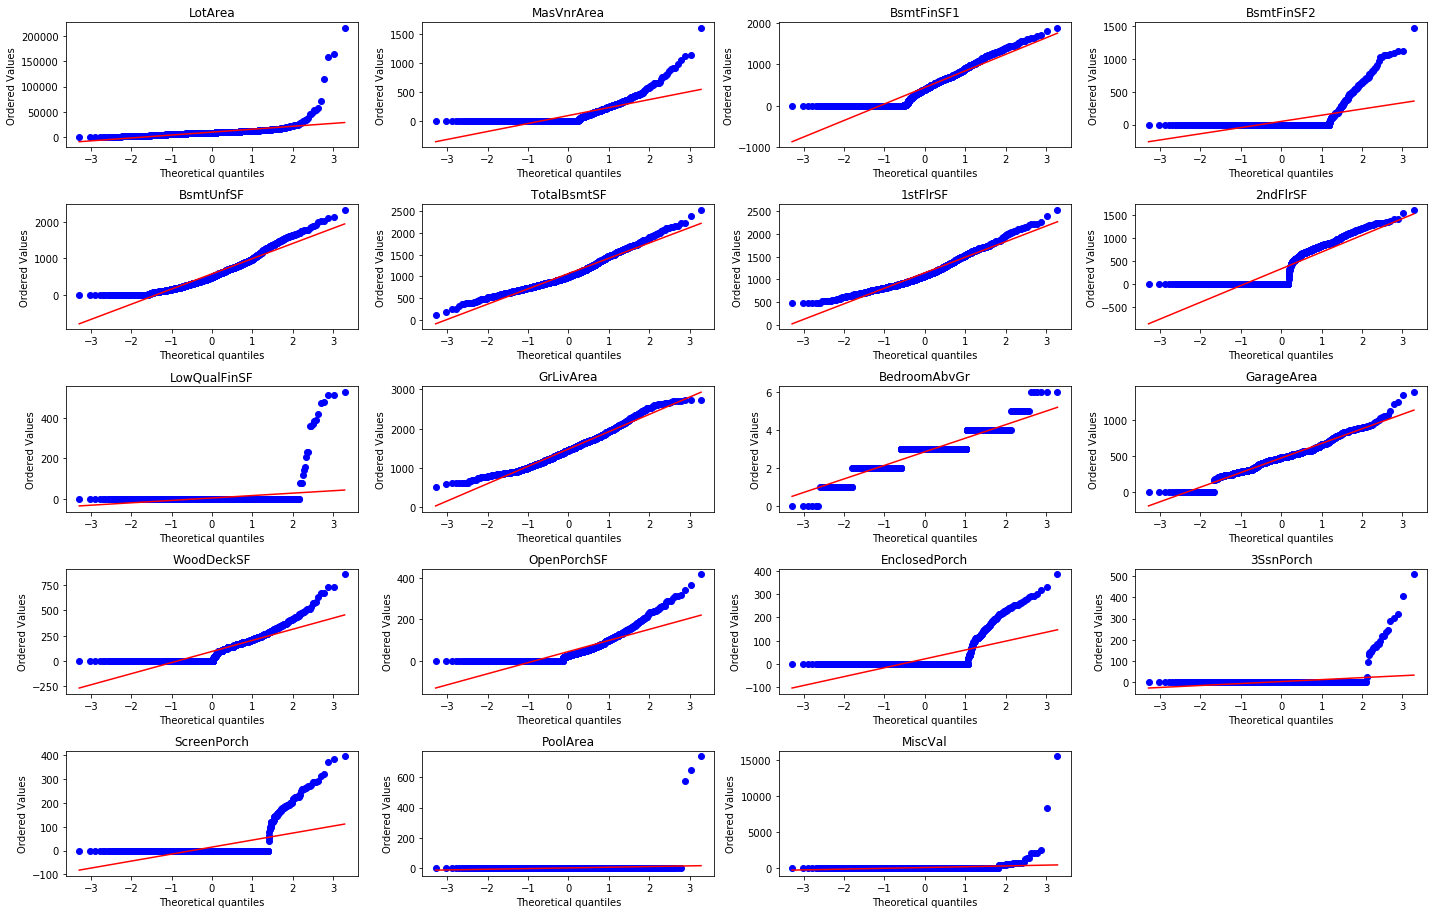

In [38]:
plt.figure(figsize = (20,25))

for i, col in enumerate(numerical_columns):
    axes = plt.subplot(10,4,i+1)
    stats.probplot(train_df[col], plot = plt)
    plt.title(col)

plt.tight_layout(pad = 1.0)

Ok, now we have the skewness, kurtosis and probability plots of the numerical features, lets decide which features need to be log-transformed. As ideal values of skewness and kurtosis are both 0, some features have skewness and kurtosis quite close to this value. Hence I will define a threshold of skewness of above 0.75 for features to be log transformed. As features who have low skewness also have a low kurtosis, we do not need to set a threshold for kurtosis.

In [39]:
numerical_columns = ['LotArea',  'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
       'BedroomAbvGr', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch']


def high_skew(dataframe, colls):
    """
    This function will only keep features which have high skewness
    
    Input: Dataframe 
    
    Output: Array with features which have high skew
    
    """
    
    #Creating empty array to store high skewed features
    high_skewed_features = []
    
    for i, col in enumerate(colls):
        
        skewness_df = dataframe[col].skew()
        
        #Condition for which features to keep
        if skewness_df > 1:
            
            #Adding the feature name to array
            high_skewed_features.append(col)
    
    return high_skewed_features

In [40]:
#Calling function on train_df
high_skewed_features_train_df = high_skew(train_df, numerical_columns)
print(high_skewed_features_train_df)

['LotArea', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']


In [41]:
import scipy

#Performing a boxcox transformation to manage skewness
high_skewed_features_train_df_box = scipy.special.boxcox1p(train_df[high_skewed_features_train_df], 0.5)

Unlike before when I used a log transformation, now my features have negative values hence a log transformation does not work. Therefore, I use a boxcox transformation. For more information about how boxcox transformations:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.boxcox1p.html

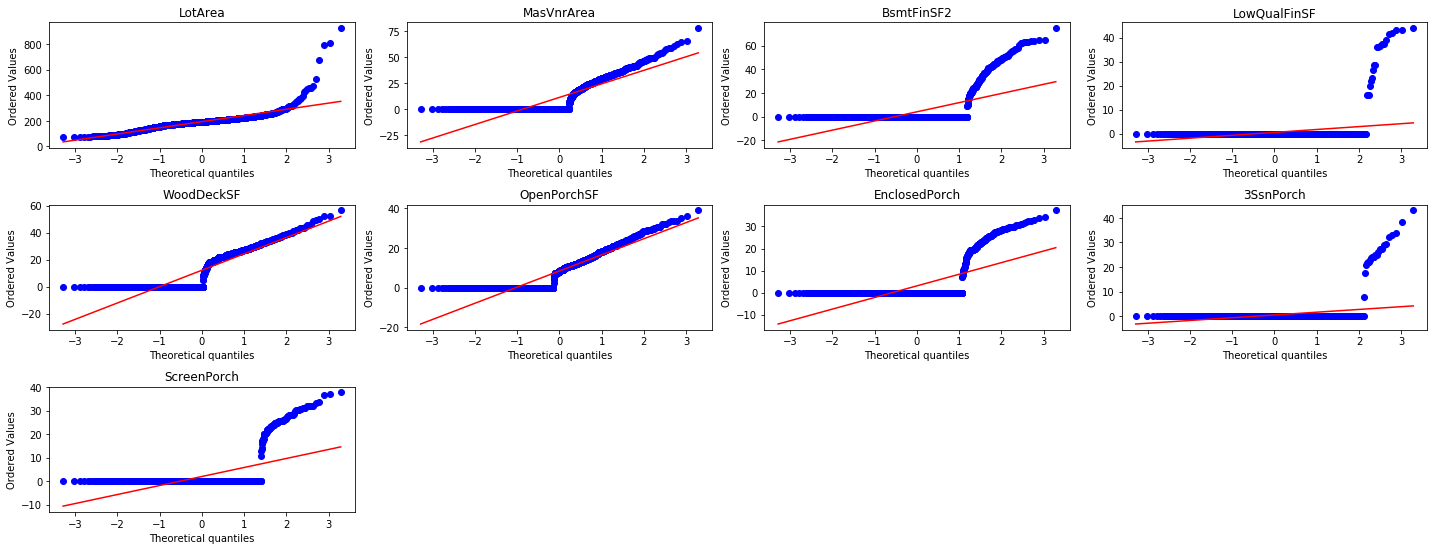

In [42]:
plt.figure(figsize = (20,25))

#Checking new lines of best fit
for i, col in enumerate(high_skewed_features_train_df):
    axes = plt.subplot(10,4,i+1)
    stats.probplot(high_skewed_features_train_df_box[col], plot = plt)
    plt.title(col)
        
plt.tight_layout(pad = 1.0)

In [43]:
#Checking skewness is reduced
for i, col in enumerate(high_skewed_features_train_df):
    skewness = high_skewed_features_train_df_box[col].skew()
    print('Skewness of', col, 'is', skewness)

Skewness of LotArea is 4.368044693263819
Skewness of MasVnrArea is 1.0535272749685074
Skewness of BsmtFinSF2 is 3.0588149311390076
Skewness of LowQualFinSF is 9.017708889454473
Skewness of WoodDeckSF is 0.5064592144802054
Skewness of OpenPorchSF is 0.6400877188563249
Skewness of EnclosedPorch is 2.381578795644092
Skewness of 3SsnPorch is 8.270539021633104
Skewness of ScreenPorch is 3.30897987124542


As we can see the skewness has been reduced for the high skew features. Although some still have high skews (skewness > 5), this could be because of a number of reasons, such as less houses having this feature or the houses which have these features are very different to the rest of the dataset. Therefore, as only a few features demonstrate this high skewness, we can just ignore it as it won't have a large effect on our model.

In [44]:
#Dropping columns with skewed values and replacing them with transformed values

train_df[high_skewed_features_train_df] = high_skewed_features_train_df_box

### And beyond...

Now my training dataset is finally ready for modelling. Let me show my dataframe one last time.

In [45]:
train_df

,Id,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,181.858641,2003,2003,26.071338,706,0.000000,150,856,856,...,0,0,0,1,0,0,0,0,1,0
1,2,193.969385,1976,1976,0.000000,978,0.000000,284,1262,1262,...,0,0,0,1,0,0,0,0,1,0
2,3,210.141462,2001,2002,23.534291,486,0.000000,434,920,920,...,0,0,0,1,0,0,0,0,1,0
3,4,193.458435,1915,1970,0.000000,216,0.000000,540,756,961,...,0,0,0,1,1,0,0,0,0,0
4,5,236.838858,2000,2000,35.469988,655,0.000000,490,1145,1145,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175.966289,1999,2000,0.000000,0,0.000000,953,953,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,227.573518,1978,1988,19.908902,790,23.612497,589,1542,2073,...,0,0,0,1,0,0,0,0,1,0
1457,1458,188.189379,1941,2006,0.000000,275,0.000000,877,1152,1188,...,0,0,0,1,0,0,0,0,1,0
1458,1459,195.159834,1950,1996,0.000000,49,62.187226,0,1078,1078,...,0,0,0,1,0,0,0,0,1,0


# Cleaning Test Data

This section will use many of the techniques and decisions I made when processing the training dataset.

In [46]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


Lets convert the values which are currently not in their correct format

In [47]:
test_df['MSSubClass'] = str(test_df['MSSubClass'])
test_df['OverallCond'] = str(test_df['OverallCond'])
test_df['OverallQual'] = str(test_df['OverallQual'])
test_df['YrSold'] = str(test_df['YrSold'])
test_df['MoSold'] = str(test_df['MoSold'])

### Missing Values

In [48]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

This is not that useful, lets only retrieve the columns with missing values and what percentage of values are missing.

In [49]:
test_missing = test_df.isna().mean() * 100

test_missing_drop = test_missing.drop(test_missing[test_missing == 0].index).sort_values()
print(test_missing_drop)

TotalBsmtSF      0.068540
GarageArea       0.068540
GarageCars       0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
SaleType         0.068540
Exterior1st      0.068540
Exterior2nd      0.068540
Functional       0.137080
Utilities        0.137080
BsmtHalfBath     0.137080
BsmtFullBath     0.137080
MSZoning         0.274160
MasVnrArea       1.028101
MasVnrType       1.096642
BsmtFinType2     2.878684
BsmtFinType1     2.878684
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtCond         3.084304
GarageType       5.209047
GarageFinish     5.346127
GarageQual       5.346127
GarageCond       5.346127
GarageYrBlt      5.346127
LotFrontage     15.558602
FireplaceQu     50.034270
Fence           80.123372
Alley           92.666210
MiscFeature     96.504455
PoolQC          99.794380
dtype: float64


As we want to pass the same features from the test set into our model which was fitted on the training set, lets see which columns in the test set we can remove straight away. 

In [50]:
train_df[train_df.columns[0:30]].columns 

Index(['Id', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [51]:
test_df.select_dtypes(include = np.number).columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

Ok, so we can drop 'Id', 'LotFrontage', 'GarageYrBlt'. 

In [52]:
test_df = test_df.drop(columns = ['Id', 'LotFrontage', 'GarageYrBlt'])

In [53]:
test_missing = test_df.isna().mean() * 100

test_missing_drop = test_missing.drop(test_missing[test_missing == 0].index).sort_values()
print(test_missing_drop)

TotalBsmtSF      0.068540
GarageArea       0.068540
GarageCars       0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
SaleType         0.068540
Exterior1st      0.068540
Exterior2nd      0.068540
Functional       0.137080
Utilities        0.137080
BsmtHalfBath     0.137080
BsmtFullBath     0.137080
MSZoning         0.274160
MasVnrArea       1.028101
MasVnrType       1.096642
BsmtFinType2     2.878684
BsmtFinType1     2.878684
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtCond         3.084304
GarageType       5.209047
GarageFinish     5.346127
GarageQual       5.346127
GarageCond       5.346127
FireplaceQu     50.034270
Fence           80.123372
Alley           92.666210
MiscFeature     96.504455
PoolQC          99.794380
dtype: float64


We can remove 'Fence', 'Alley', 'MiscFeature', 'PoolQC' as they have lots of missing values so do not contribute much to the model. 

In [54]:
test_df = test_df.drop(columns = ['Fence', 'Alley', 'MiscFeature', 'PoolQC', 'FireplaceQu'])

In [55]:
test_missing = test_df.isna().mean() * 100

test_missing_drop = test_missing.drop(test_missing[test_missing == 0].index).sort_values()
print(test_missing_drop)

BsmtFinSF2      0.068540
GarageArea      0.068540
GarageCars      0.068540
KitchenQual     0.068540
TotalBsmtSF     0.068540
BsmtUnfSF       0.068540
BsmtFinSF1      0.068540
SaleType        0.068540
Exterior1st     0.068540
Exterior2nd     0.068540
BsmtHalfBath    0.137080
Utilities       0.137080
Functional      0.137080
BsmtFullBath    0.137080
MSZoning        0.274160
MasVnrArea      1.028101
MasVnrType      1.096642
BsmtFinType2    2.878684
BsmtFinType1    2.878684
BsmtQual        3.015764
BsmtExposure    3.015764
BsmtCond        3.084304
GarageType      5.209047
GarageCond      5.346127
GarageFinish    5.346127
GarageQual      5.346127
dtype: float64


Now I am going to check which of these columns I have already removed from the training set so I can remoove these columns. Then I will impute the rest of the missing values with 0.

These columns can be removed as they are not in our training set 'BsmtQual', 'GarageCond', 'GarageFinish'.

In [56]:
test_df = test_df.drop(columns = ['BsmtQual', 'GarageCond', 'GarageFinish'])

In [57]:
test_missing = test_df.isna().mean() * 100

test_missing_drop = test_missing.drop(test_missing[test_missing == 0].index).sort_values()
print(test_missing_drop)

BsmtFinSF2      0.068540
GarageArea      0.068540
GarageCars      0.068540
KitchenQual     0.068540
TotalBsmtSF     0.068540
BsmtUnfSF       0.068540
BsmtFinSF1      0.068540
SaleType        0.068540
Exterior2nd     0.068540
Exterior1st     0.068540
BsmtFullBath    0.137080
BsmtHalfBath    0.137080
Functional      0.137080
Utilities       0.137080
MSZoning        0.274160
MasVnrArea      1.028101
MasVnrType      1.096642
BsmtFinType1    2.878684
BsmtFinType2    2.878684
BsmtExposure    3.015764
BsmtCond        3.084304
GarageType      5.209047
GarageQual      5.346127
dtype: float64


In [58]:
test_df = test_df.fillna(0)

In [59]:
test_missing = test_df.isna().mean() * 100

test_missing_drop = test_missing.drop(test_missing[test_missing == 0].index).sort_values()
print(test_missing_drop)

Series([], dtype: float64)


Now we no longer have any missing values. 

In [60]:
test_df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0 20\n1 20\n2 60\n3 ...,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,120,0,0,0 6\n1 6\n2 3\n3 6...,0 2010\n1 2010\n2 2010\n3 ...,WD,Normal
1,0 20\n1 20\n2 60\n3 ...,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,36,0,0,0,0,12500,0 6\n1 6\n2 3\n3 6...,0 2010\n1 2010\n2 2010\n3 ...,WD,Normal
2,0 20\n1 20\n2 60\n3 ...,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,34,0,0,0,0,0,0 6\n1 6\n2 3\n3 6...,0 2010\n1 2010\n2 2010\n3 ...,WD,Normal
3,0 20\n1 20\n2 60\n3 ...,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,36,0,0,0,0,0,0 6\n1 6\n2 3\n3 6...,0 2010\n1 2010\n2 2010\n3 ...,WD,Normal
4,0 20\n1 20\n2 60\n3 ...,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,82,0,0,144,0,0,0 6\n1 6\n2 3\n3 6...,0 2010\n1 2010\n2 2010\n3 ...,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0 20\n1 20\n2 60\n3 ...,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,0 6\n1 6\n2 3\n3 6...,0 2010\n1 2010\n2 2010\n3 ...,WD,Normal
1455,0 20\n1 20\n2 60\n3 ...,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,24,0,0,0,0,0,0 6\n1 6\n2 3\n3 6...,0 2010\n1 2010\n2 2010\n3 ...,WD,Abnorml
1456,0 20\n1 20\n2 60\n3 ...,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,0,0,0,0,0 6\n1 6\n2 3\n3 6...,0 2010\n1 2010\n2 2010\n3 ...,WD,Abnorml
1457,0 20\n1 20\n2 60\n3 ...,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,32,0,0,0,0,700,0 6\n1 6\n2 3\n3 6...,0 2010\n1 2010\n2 2010\n3 ...,WD,Normal


### Outliers

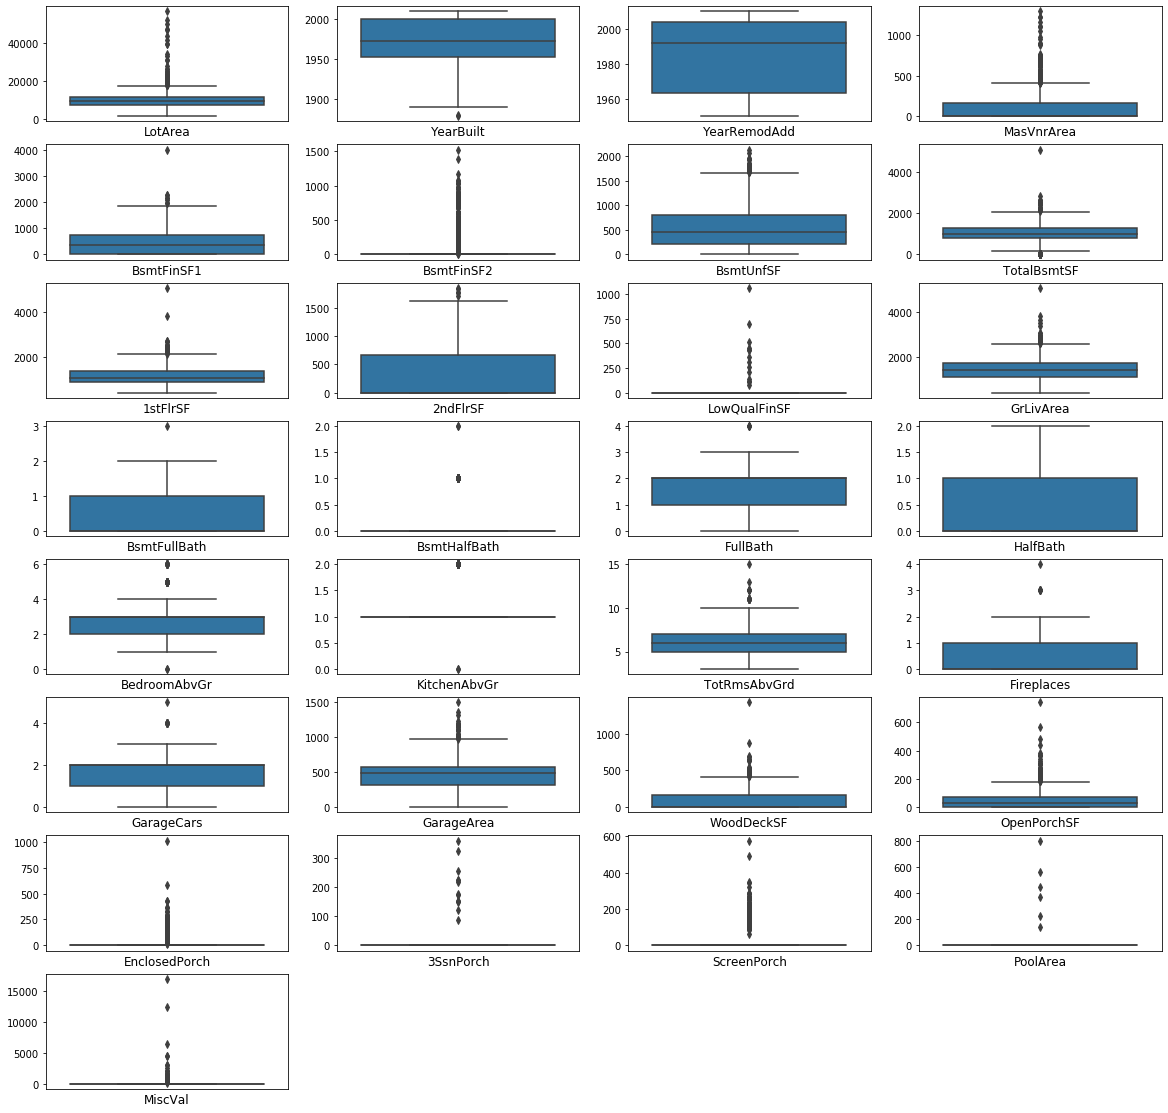

In [61]:
plt.figure(figsize=(20,25))

numerical_cols = test_df.select_dtypes(exclude = 'object')

#This 'for' loop allows me to loop over numerical_cols using enumerate, whilst keeping track of the index in i
for i, col in enumerate(numerical_cols.columns):
    # axes allows you to plot multiple axes and do things to the individual axes (i.e. label them)
    axes = plt.subplot(10,4,i+1)
    sns.boxplot(data = test_df[col])
    axes.set_xlabel(col, fontsize = 12)
    axes.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
    
plt.tight_layout
plt.show;

Clearly, 'LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea', 'OpenPorchSF' have outliers which can be removed.

In [62]:
def outlier_drop(data_frame, columns_outliers):
    """
    This function will drop all of the outliers in features which are specified
    
    Input: dataframe and features with outliers that need removing
    
    Output: updated dataframe with outliers removed
    
    """
        
    for i, col in enumerate(columns_outliers):
        q1_col, q3_col = np.percentile(data_frame[col], [25,75])
        iqr_col = q3_col - q1_col
        
        lowerbound_col = q1_col - (1.5 * iqr_col)
        upperbound_col = q3_col + (1.5 * iqr_col)
        
        outliers = (data_frame[(data_frame[col] < lowerbound_col) 
                              | (data_frame[col] > upperbound_col)].index)
    
    data_frame = data_frame.drop(outliers)
    
    return data_frame

In [63]:
outliers_columns = ['LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea', 'OpenPorchSF']

#Removing outliers from test dataframe
outlier_drop(test_df, outliers_columns)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0 20\n1 20\n2 60\n3 ...,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,120,0,0,0 6\n1 6\n2 3\n3 6...,0 2010\n1 2010\n2 2010\n3 ...,WD,Normal
1,0 20\n1 20\n2 60\n3 ...,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,36,0,0,0,0,12500,0 6\n1 6\n2 3\n3 6...,0 2010\n1 2010\n2 2010\n3 ...,WD,Normal
2,0 20\n1 20\n2 60\n3 ...,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,34,0,0,0,0,0,0 6\n1 6\n2 3\n3 6...,0 2010\n1 2010\n2 2010\n3 ...,WD,Normal
3,0 20\n1 20\n2 60\n3 ...,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,36,0,0,0,0,0,0 6\n1 6\n2 3\n3 6...,0 2010\n1 2010\n2 2010\n3 ...,WD,Normal
4,0 20\n1 20\n2 60\n3 ...,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,82,0,0,144,0,0,0 6\n1 6\n2 3\n3 6...,0 2010\n1 2010\n2 2010\n3 ...,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0 20\n1 20\n2 60\n3 ...,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,0 6\n1 6\n2 3\n3 6...,0 2010\n1 2010\n2 2010\n3 ...,WD,Normal
1455,0 20\n1 20\n2 60\n3 ...,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,24,0,0,0,0,0,0 6\n1 6\n2 3\n3 6...,0 2010\n1 2010\n2 2010\n3 ...,WD,Abnorml
1456,0 20\n1 20\n2 60\n3 ...,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,0,0,0,0,0 6\n1 6\n2 3\n3 6...,0 2010\n1 2010\n2 2010\n3 ...,WD,Abnorml
1457,0 20\n1 20\n2 60\n3 ...,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,32,0,0,0,0,700,0 6\n1 6\n2 3\n3 6...,0 2010\n1 2010\n2 2010\n3 ...,WD,Normal


### Checking skewness 

In [64]:
#Choosing numerical columns
test_numerical_columns = test_df.select_dtypes(include = np.number).columns


for i, col in enumerate(test_numerical_columns):
    skewness = test_df[col].skew()
    kurt = test_df[col].kurtosis()
    print('Skewness of', col, 'is', skewness)
    print('Kurtosis of', col, 'is', kurt, '\n')

Skewness of LotArea is 3.115216613500925
Kurtosis of LotArea is 20.746548709480273 

Skewness of YearBuilt is -0.5876566078696325
Kurtosis of YearBuilt is -0.579320618279759 

Skewness of YearRemodAdd is -0.39990598881237394
Kurtosis of YearRemodAdd is -1.4125856813078284 

Skewness of MasVnrArea is 2.549568580084032
Kurtosis of MasVnrArea is 8.479206132512642 

Skewness of BsmtFinSF1 is 1.1663296764605604
Kurtosis of BsmtFinSF1 is 2.673291224416369 

Skewness of BsmtFinSF2 is 4.0429539042374705
Kurtosis of BsmtFinSF2 is 17.68216539285966 

Skewness of BsmtUnfSF is 0.9199232287642486
Kurtosis of BsmtUnfSF is 0.33244656805494754 

Skewness of TotalBsmtSF is 0.8050662652894462
Kurtosis of TotalBsmtSF is 5.173387914148094 

Skewness of 1stFlrSF is 1.558194572983426
Kurtosis of 1stFlrSF is 8.053863335994567 

Skewness of 2ndFlrSF is 0.9128826344911904
Kurtosis of 2ndFlrSF is -0.27544098409544926 

Skewness of LowQualFinSF is 16.167254030990343
Kurtosis of LowQualFinSF is 308.67690650153196

In [65]:
# Selecting features with high skew
test_high_skew = high_skew(test_df, test_numerical_columns)

In [66]:
# Performing boxcox transformation for features with high skew
high_skewed_features_test_df_box = scipy.special.boxcox1p(test_df[test_high_skew], 0.5)

In [67]:
for i, col in enumerate(test_high_skew):
    skewness = high_skewed_features_test_df_box[col].skew()
    print('Skewness of', col, 'is', skewness)

Skewness of LotArea is 0.7363390828698114
Skewness of MasVnrArea is 1.149356822074124
Skewness of BsmtFinSF1 is 0.04578881428414585
Skewness of BsmtFinSF2 is 2.980868196365515
Skewness of 1stFlrSF is 0.6486423873019207
Skewness of LowQualFinSF is 12.029002531472997
Skewness of GrLivArea is 0.538179736134212
Skewness of BsmtHalfBath is 3.6894768259301016
Skewness of KitchenAbvGr is 3.757919518725453
Skewness of WoodDeckSF is 0.5858574655441303
Skewness of OpenPorchSF is 0.747153597002874
Skewness of EnclosedPorch is 2.3182627997359506
Skewness of 3SsnPorch is 11.085387021724689
Skewness of ScreenPorch is 2.9726015541097697
Skewness of PoolArea is 17.173516060992487
Skewness of MiscVal is 9.611681553124736


Clearly skewness has been reduced.

In [68]:
# Replacing features with high skew with transformed values
test_df[test_high_skew] = high_skewed_features_test_df_box

### Categorical Variables

Lets encode all of the categorical variables.

In [69]:
test_df = pd.get_dummies(test_df)
test_df

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,213.620036,1961,1961,0.000000,41.312816,22.083189,270.0,882.0,57.899917,0,...,0,0,0,1,0,0,0,0,1,0
1,236.897468,1958,1958,18.880613,58.794737,0.000000,406.0,1329.0,70.938330,0,...,0,0,0,1,0,0,0,0,1,0
2,233.210544,1997,1998,0.000000,54.284989,0.000000,137.0,928.0,58.959003,701,...,0,0,0,1,0,0,0,0,1,0
3,197.789890,1998,1998,7.165151,47.112117,0.000000,324.0,926.0,58.893349,678,...,0,0,0,1,0,0,0,0,1,0
4,139.506184,1992,1992,0.000000,30.496154,0.000000,1017.0,1280.0,69.582121,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,86.022724,1970,1970,0.000000,0.000000,0.000000,546.0,546.0,44.776062,546,...,0,0,0,1,0,0,0,0,1,0
1455,85.063195,1970,1970,0.000000,29.811947,0.000000,294.0,546.0,44.776062,546,...,0,0,0,1,1,0,0,0,0,0
1456,280.849783,1960,1996,0.000000,68.000000,0.000000,0.0,1224.0,68.000000,0,...,0,0,0,1,1,0,0,0,0,0
1457,202.372209,1992,1992,0.000000,34.769553,0.000000,575.0,912.0,60.321746,0,...,0,0,0,1,0,0,0,0,1,0


### Comparing Test and Train datasets

Let me double check the test and train sets are similar so the test set can pass through the model.

In [70]:
print(train_df.shape)
print(test_df.shape)

(1362, 255)
(1459, 254)


I am going to examine the column names to see if there are any columns which are in the test set but not in the training set and I will remove these columns

In [71]:
list(test_df.columns)

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MSSubClass_0        20\n1        20\n2        60\n3        60\n4       120\n       ... \n1454    160\n1455    160\n1456     20\n1457     85\n1458     60\nName: MSSubClass, Length: 1459, dtype: int64',
 'MSZoning_0',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_0',
 'Utilities_AllPub',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 '

In [72]:
list(train_df.columns)

['Id',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'MSSubClass_0       60\n1       20\n2       60\n3       70\n4       60\n        ..\n1455    60\n1456    20\n1457    70\n1458    20\n1459    20\nName: MSSubClass, Length: 1362, dtype: int64',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 '

'Utilities_0' is a feature which should be removed

In [73]:
test_df = test_df.drop(columns = 'Utilities_0')

Now the test set is ready to pass through my models

# Modelling

First lets split our data up into the features we want to learn from and the features we want to test on.

In [74]:
#Dropping the column Id as it is just a label for the row. We can use inbuilt Python index
train_df = train_df.drop(columns = 'Id')

In [75]:
#These are the features which our model will use to make predictions about SalePrice
X = train_df.drop(columns = 'SalePrice')

In [76]:
#Our target variable
y = train_df['SalePrice']

I will now split X and y into train and test splits using StratifiedKFold which preserves the distribution of the data and uses all the data to train and test models. 

In [77]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
train_df_split = skf.get_n_splits(X,y)

### Linear Regression 

I will first fit a simple linear regression model and find the model accuracy using the error metric cross_val_score. For more information on how the LinearRegression model operates: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [78]:
lr = LinearRegression()

#Calculating cross_val_score for the 10 folds
train_lr_scores = (-1) * cross_val_score(lr, X, y, cv = train_df_split, scoring = 'neg_mean_absolute_error')

print(train_lr_scores)

[0.07766194 0.08720395 0.08578021 0.08860303 0.09179059 0.07992134
 0.07895251 0.07925374 0.08040423 0.08601455]


In [79]:
#Calculating the mean of these scores
train_lr_scores_mean = np.mean(train_lr_scores) 
print(train_lr_scores_mean)

0.08355861009621796


An MAE of 0.084! This is quite good. However we just picked a random number of folds. Lets see how this value varies with the number of folds. 

In [80]:
def best_cross_val_score(model, data_X, data_y, splits):
    
    """
    This function will give the best cross validation score from a range of stratified splits
    
    Input: machine learning model, input features, target features, no. of desired splits
    
    Output: Best mean cross validation score, plot of mean cross validation score with no. of splits
    
    """
    
    data_mean_array = []
    split_array = []
    
    for i, split in enumerate(range(2, splits+1)):
        
        skf_loop = StratifiedKFold(n_splits=split, shuffle=True, random_state=42)
        data_split = skf_loop.get_n_splits(data_X, data_y)
        data_scores = (-1) * cross_val_score(model, data_X, data_y, cv = data_split, scoring = 'neg_mean_absolute_error')
        data_scores_mean = np.mean(data_scores)
        data_mean_array.append(data_scores_mean)
        split_array.append(split)
    
    print('The most accurate mean cross validation score is', max(data_mean_array))
    
    plt.figure(figsize = (15,10))
    plt.plot(split_array, data_mean_array,'b', marker='.', markersize=14)
    plt.title("Effect of number of stratified splits on cross_val_score mean", fontsize = 14)
    plt.xlabel("No. of stratified splits", fontsize = 14)
    plt.ylabel("Cross validation score mean", fontsize = 14)
    plt.show()

The most accurate mean cross validation score is 0.09198970379208748


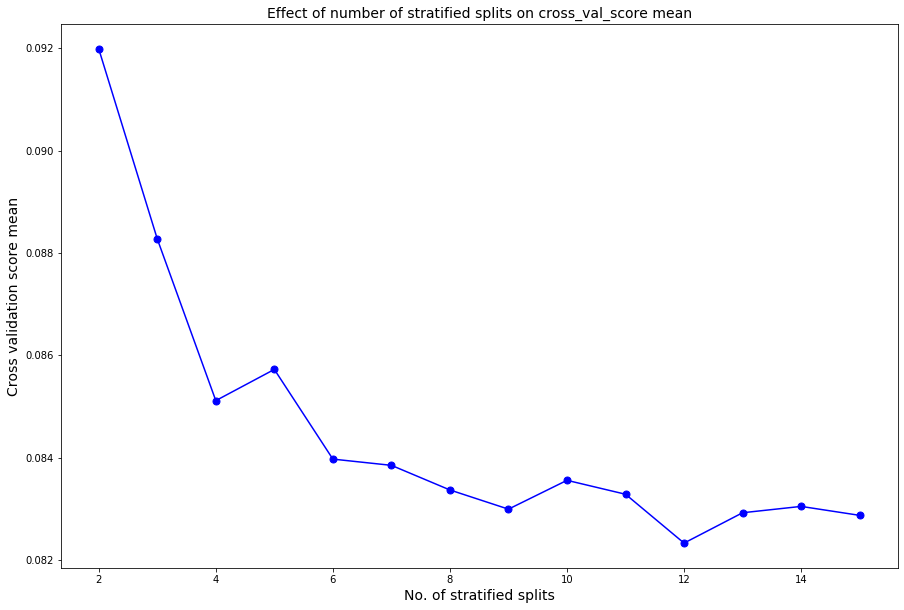

In [81]:
#Finding the number of splits which results in the best cross validation score
best_cross_val_score(lr, X, y, 15)

So we can see that as the number of folds the CVS mean increases. Therefore our accuracy increases. I used splits = 15 as any greater, it becomes computationally expensive to run the code whilst the accuracy does not improve by much. Therefore the 12 is the best number of stratified splits to use.

In [82]:
# Storing the most accurate model
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=42)
train_df_split = skf.get_n_splits(X,y)

The number of splits will be useful for when I start to hypertune parameters to build more accurate models. Now I will split my training data so that I can fit in a simple linear regression model.

In [83]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [84]:
# Fitting model to training split data
lr.fit(X_train,y_train)

# Predicting SalePrice using model on test split data
y_pred_lr = lr.predict(X_test)

# Calculating mean absolute error between predicted values and actual values
print(mean_absolute_error(y_pred_lr, y_test))

0.08945059791046515


I achieve a low mean absolute error of 0.0895. This is impressive. However I think we can reduce this by finding a better model. 

Now, let me use this model to predict on my test set

In [85]:
# Storing prediction on test set
lr_pred = lr.predict(test_df)

### Ridge Regression

I will now use a ridge regression model which should hopefully manage some of the overfitting of a standard ordinary least squares model. For more information: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [86]:
rr = Ridge(alpha = 1.0, random_state=42)

In [87]:
rr.fit(X_train, y_train)

y_pred_rr = rr.predict(X_test)

print(mean_absolute_error(y_pred_rr, y_test))

0.0852248591197156


Now we have used the ridge regression model we have reduced the mean absolute error. Although the reduction is minimal. 

However, we have only done this for 1 alpha value, let me do this for a range of alpha values. I will use the GridSearchCV function for this. GridSearchCV allows me to do an exhaustive search over a range of parameter values. For more information: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [88]:
# Some warnings were appearing so I will ignore them for now
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

As I am tuning hyperparameters I will use a cross validation splitting strategy using my best stratified k folds splitting strategy found previously.

In [89]:
# Defining range of parameters to use
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(rr, parameters, scoring = 'neg_mean_absolute_error', cv = train_df_split)

ridge_regressor.fit(X, y)

GridSearchCV(cv=12, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=42,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [90]:
print('The best parameter for', ridge_regressor.best_params_)
print('The best mean absolute error:', (-1) * ridge_regressor.best_score_)

The best parameter for {'alpha': 5}
The best mean absolute error: 0.07871660662991475


Clearly, now the mean absolute error has reduced by a much greater amount and we have found a better model. Therefore, I will use this model to make my predictions with the test data

In [91]:
rr_pred = ridge_regressor.predict(test_df)

### Lasso Regression

Now I will use a lasso regression model to check whether anymore improvements can be made. For more information: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [92]:
lasso = Lasso(random_state = 42)

lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_absolute_error', cv = train_df_split)

lasso_regressor.fit(X, y)

GridSearchCV(cv=12, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=42,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [93]:
print('The best parameter for', lasso_regressor.best_params_)
print('The best mean absolute error:', (-1) * lasso_regressor.best_score_)

The best parameter for {'alpha': 0.0001}
The best mean absolute error: 0.07947369397324025


The lasso regression model does not improve on the mean absolute error hence I will not make predictions using this model.

### Elastic Net

Now I will use the Elastic Net model which uses both ridge regression and lasso regression to build a model which should help manage overfitting and underfitting. For documentation on this model: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [94]:
from sklearn.linear_model import ElasticNet

In [95]:
parameters_grid = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20],
                   'l1_ratio': [0, 0.1, 1]}

In [96]:
elastic = ElasticNet(random_state = 42)

elastic_regressor = GridSearchCV(elastic, parameters_grid, scoring = 'neg_mean_absolute_error', cv = train_df_split)

elastic_regressor.fit(X, y)

GridSearchCV(cv=12, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=42, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20],
                         'l1_ratio': [0, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [97]:
print('The best parameter for', elastic_regressor.best_params_)
print('The best mean absolute error:', (-1) * elastic_regressor.best_score_)

The best parameter for {'alpha': 0.01, 'l1_ratio': 0}
The best mean absolute error: 0.07883602214880273


As we can see the mean absolute error does not improve. Also, this is a computationally expensive model to run for only a likely minimally improved model hence it will not be used.

### Decision Tree Regressor

A decision tree aims to create a predictive model by learning decision rules which are inferred from the features of the dataset. For more information on the model: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html and https://scikit-learn.org/stable/modules/tree.html#tree

In [98]:
dt = DecisionTreeRegressor(criterion = 'mae', random_state = 42)

parameters_dt = {'max_depth': [3, 5],
                'max_leaf_nodes': [3, 5]} 

dt_regressor = GridSearchCV(dt, parameters_dt, cv = train_df_split, scoring = 'neg_mean_absolute_error')

dt_regressor.fit(X, y)

GridSearchCV(cv=12, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mae', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=42,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5], 'max_leaf_nodes': [3, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [99]:
print('The best parameter for', dt_regressor.best_params_)
print('The best mean absolute error:', (-1) * dt_regressor.best_score_)

The best parameter for {'max_depth': 3, 'max_leaf_nodes': 5}
The best mean absolute error: 0.17712525691570757


If we add more parameters to further hypertune this model, it is very computationally expensive and runs very slowly. Also, the mean absolute error is a lot greater than the ones acheived using ridge regression hence this is not an ideal model to use. Lets take a deeper look as to why this model has not worked as well.

In the plot below, I do not use the same splitting of the training data as I did in my calculation of the mean absolute error. This is because I am not conerned so much about the accuracy of the following model, but to demonstrate where this type of model fails when working with the training data I use.

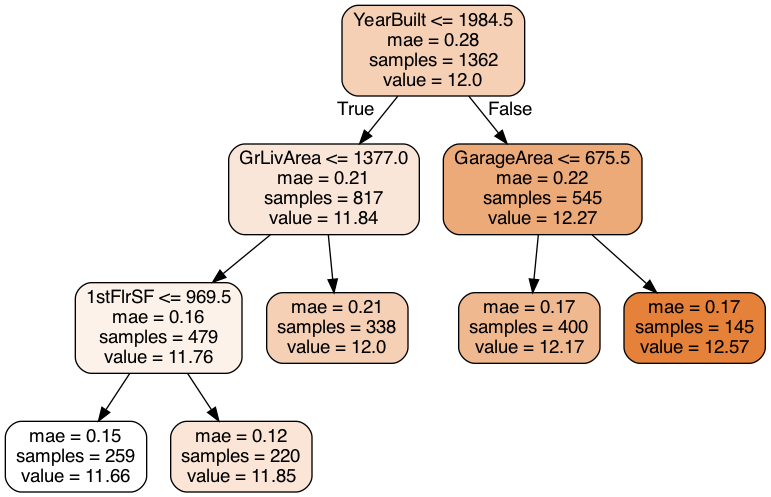

In [100]:
from sklearn import tree

dt_plot = DecisionTreeRegressor(criterion = 'mae', random_state = 42, max_depth = 3, max_leaf_nodes = 5)

dt_plot = dt_plot.fit(X, y)


from sklearn.tree import export_graphviz

# Export as dot file
export_graphviz(dt_plot, out_file='tree.dot', 
                feature_names = X.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

import pydot

(graph,) = pydot.graph_from_dot_file(r'tree.dot')
graph.write_png(r'tree.png')

# Display in jupyter notebook
from IPython.display import Image
Image(filename = r'tree.png')

As we can see from the decision tree plot above, this is not a great model for our dataset as we have lots of features which makes the decision tree computationally expensive to run. Additionally, if we do use a decision tree, I will only use a small number of features, making my model prone to underfitting. Therefore, this model leads to a high mean absolute error.

### Random Forest Regressor

Now I will use a random forest tree, as this model uses many trees and makes predictions by averaging the predictions of each component tree. This will help use as many features as possible when training a model hence managing underfitting and overfitting. For more information: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Instead of using GridSearchCV, I use RandomizedSearchCV as I want to do a random search on the hyperparameters used to reduced computational cost. For more information: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [101]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(criterion = 'mae', random_state = 42)

parameters_rf = {'n_estimators': [10],
                 'max_depth': [3]} 

rf_regressor = RandomizedSearchCV(rf, parameters_rf, cv = train_df_split, random_state = 42, n_jobs = -1,
                                 scoring = 'neg_mean_absolute_error')

In [102]:
rf_regressor.fit(X, y)

RandomizedSearchCV(cv=12, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mae',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=

In [103]:
print('The best parameter for', rf_regressor.best_params_)
print('The best mean absolute error:',(-1) * rf_regressor.best_score_)

The best parameter for {'n_estimators': 10, 'max_depth': 3}
The best mean absolute error: 0.13293277300624817


Again, we have a high mean absolute error with a high computational cost model hence this is not an ideal model to use

### XGBoost Regressor

I will now use an agressive gradient boosting regressor to iterate over many random models to find the best model. For more information: https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [104]:
xgb = XGBRegressor(random_state = 42)

parameters_xgb = {'n_estimators': [10, 50, 100],
                 'learning_rate': [0.01, 0.025, 0.05]}

xgb_regressor = RandomizedSearchCV(xgb, parameters_xgb, cv = train_df_split, random_state = 42, 
                                  scoring = 'neg_mean_absolute_error')

In [105]:
xgb_regressor.fit(X, y)

RandomizedSearchCV(cv=12, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_co...
                                          random_state=42, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                  

In [106]:
print('The best parameter for', xgb_regressor.best_params_)
print('The best mean absolute error:',(-1) * xgb_regressor.best_score_)

The best parameter for {'n_estimators': 100, 'learning_rate': 0.05}
The best mean absolute error: 0.11441886818121688


Whilst this again reduced the mean absolute error compared to the other tree models, it is still worse than the mean absolute error achieved compared to the ones obtained from the regression models and the tree models have much greater computational cost. 

# Conclusion

In conclusion, the best model to predict SalePrice was the Ridge Regression model which has a mean absolute error of 0.07871660662991475, the lowest of all the models which were trained.

Throughout this notebook, various data science techniques have been used and I have discovered the huge computational cost of using Tree models for very large datasets. The regression models performed well in trying to predict the feature SalePrice.

Now I have completed this project, I am able to evaluate the outcome, more specifically my implementation of the various machine learning techniques used and available to me. 


What Went Well: 

 - Developed many iterative plots and functions which helped speed up exploratory data analysis
 - Improved familiarity with Python modules: NumPy, Pandas, SciPy, SkLearn and Seaborn
 - Built a machine learning model with an acceptable mean absolute errror
 

Even Better If:

 - Used more complex encoding techniques to make better use of categorical features
 - used feature engineering to create more useful features to train model on
 - Stacked models together and used more hyperparameter tuning techniques
 
One final thing which would have made my job a lot easier would be to join the training and test files right at the beginning and cleaning both of these datasets together. This would have allowed me to apply the exact same transformations to both datasets. Then I would be able to halve the conjoined dataframe so I could run separate training and testing sets into my models. But the added benefit would be the processing of both dataframes would be the same.

In further projects I will aim to develop on this improvements I have identified.

I will now store the best model in a submission file. As I log transformed the sale price values, I will reverse this so I retrieve the actual predicted Sale Price values without scaling.

In [107]:
samplesubmission = pd.read_csv(r'sample_submission.csv')

output = pd.DataFrame({'Id': samplesubmission.Id, 'SalePrice': (np.exp(rr_pred))})
output.to_csv('submission.csv', index=False)
